In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv(r'C:\Users\Acer\Desktop\online retail clustering\data\routine_rhythms_2024_final_clean.csv')
data.head(3)

,user_id,date,weekday,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,archetype_ground_truth,is_anomaly_ground_truth
0,0,2024-01-01,Monday,0,9.283352,4011,56,6.697363,0.342522,1.329944,Workaholic,0
1,0,2024-01-02,Tuesday,0,8.685627,3243,47,4.907359,2.492128,1.286140,Workaholic,0
2,0,2024-01-03,Wednesday,0,8.877688,4074,85,5.947526,1.797807,0.919941,Workaholic,0


In [4]:
features_for_clustering = [
    'screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs'
]
X = data[features_for_clustering]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss_values=[]
k_range=range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

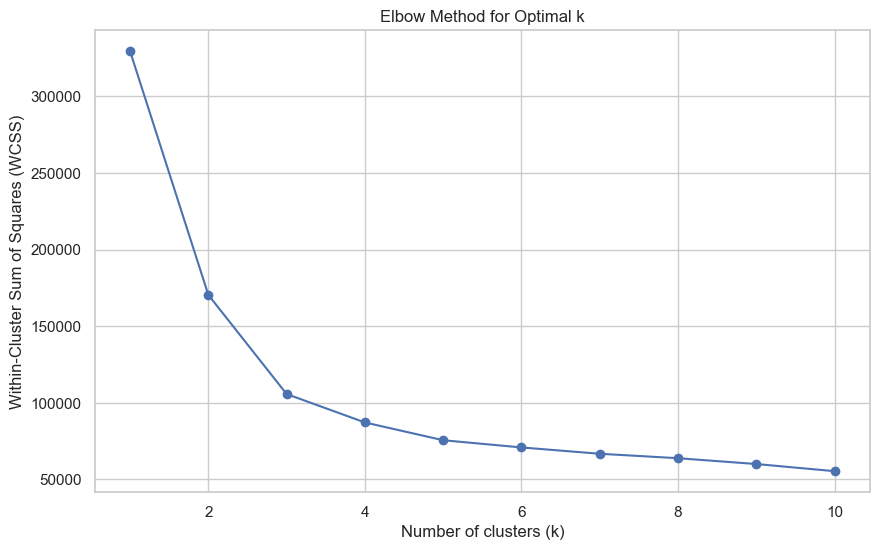

In [7]:
plt.figure(figsize=(10,6))
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

In [8]:
kmeans=KMeans(n_clusters=4, random_state=42)
data['cluster']=kmeans.fit_predict(X_scaled)
data['cluster'].value_counts()

cluster
0    21043
1    13356
2    12202
3     8299
Name: count, dtype: int64

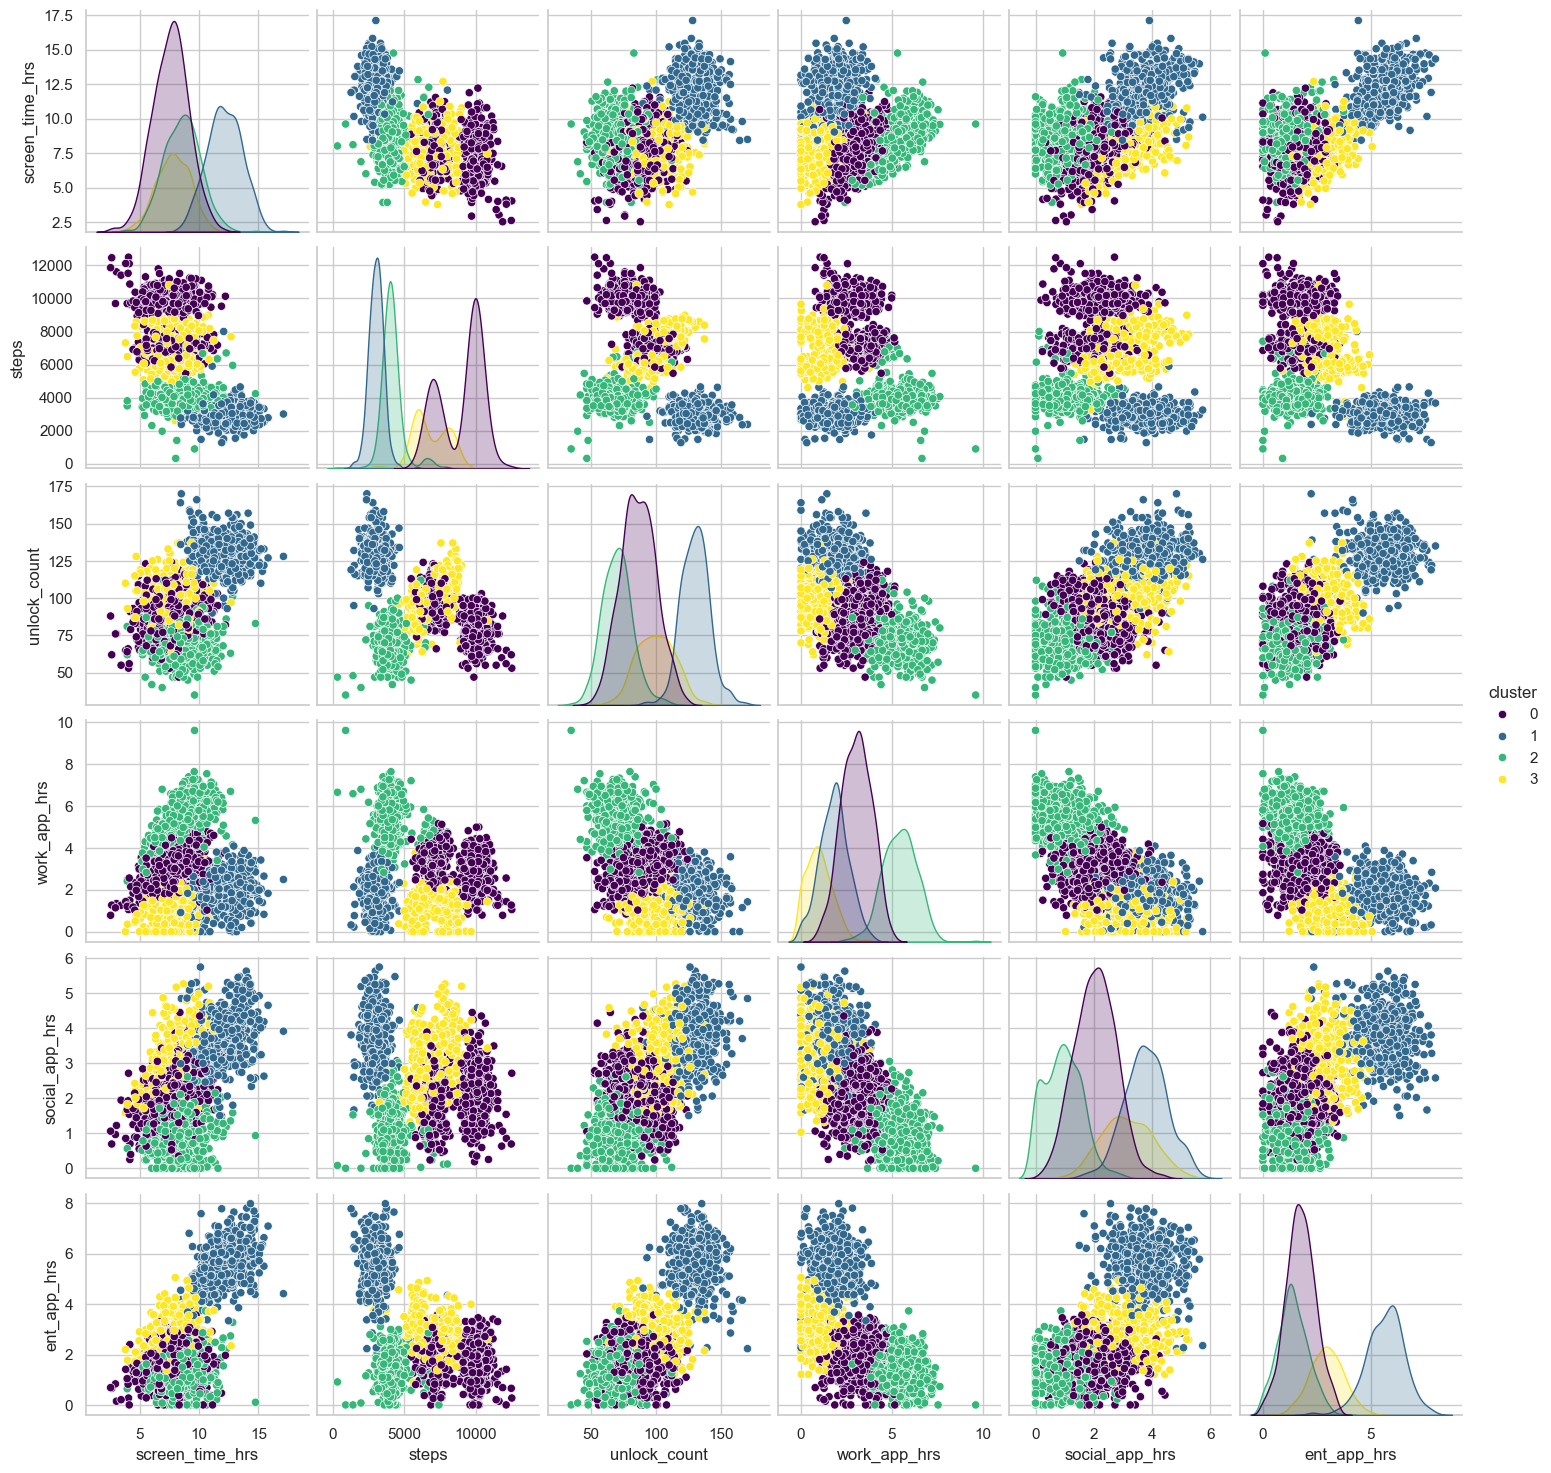

In [9]:
import seaborn as sns
sns.set(style="whitegrid")
sns.pairplot(data[['screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs',"cluster"]].sample(2000),hue='cluster', diag_kind='kde', palette='viridis')

In [10]:
#silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, data['cluster'])
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.383


In [37]:
centers=kmeans.cluster_centers_
labels=['screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs']
centers

array([[-0.55519478,  1.01774544, -0.34363977,  0.02586484, -0.25047409,
        -0.55701983],
       [ 1.32008847, -1.10407599,  1.37566085, -0.65568754,  1.09540964,
         1.5404886 ],
       [-0.15322335, -0.7275386 , -1.00715582,  1.45669159, -1.15439884,
        -0.78350489],
       [-0.49175394,  0.26813749,  0.13768344, -1.15068525,  0.56847106,
         0.08413277]])

In [43]:
#Radar chart of cluster centers
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig1=px.line_polar(r=centers[0], theta=labels, line_close=True)
fig2=px.line_polar(r=centers[1], theta=labels, line_close=True)
fig3=px.line_polar(r=centers[2], theta=labels, line_close=True)
fig4=px.line_polar(r=centers[3], theta=labels, line_close=True)

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'} , {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}]],
                    subplot_titles=( 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)
fig.update_layout(height=800, width=1000, title_text="Cluster Centers Radar Chart")
fig.show()

In [44]:
centers=scaler.inverse_transform(centers)
centers=pd.DataFrame(centers, columns=features_for_clustering)
centers

,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs
0,7.607465,8928.631564,86.516695,2.995567,2.051084,1.768255
1,11.993110,2992.158955,129.688754,1.817259,3.740066,5.603598
2,8.547538,4045.642471,69.855645,5.469265,0.916727,1.354122
3,7.755831,6831.364085,98.602839,0.961477,3.078798,2.940618


### Interpreting cluster centers.
- **Cluster 0**: Balanced Users: Least screen time, max steps, balanced time on all type of apps.
- **Cluster 1**: The Dopamine Junkie: Low steps, highest screen time, max time on entertainment apps and social media apps
- **Cluster 0**: Workaholics: Maximum screen time of work apps, less on social media and entertainment apps, Low number of steps suggesting desk work.
- **Cluster 3**: Balanced Socalizers: High steps, low work apps, high social media and entertainmetn apps.